<a href="https://colab.research.google.com/github/MoonlightO2/HR-Data/blob/main/HR_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Resource Data Analysis**
***Dataset***: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file = '/content/drive/MyDrive/Projects/Portfolio/HR/HR Data II.csv'

In [ ]:
data = pd.read_csv(file)
print('Shape: ', data.shape, '\n')
print('Columns: ', data.columns.tolist(), '\n')
data.head()

Shape:  (104, 37) 

Columns:  ['Unnamed: 0', 'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'] 



,Unnamed: 0,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
1,2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
2,4,"Anderson, Carol",10069,0,2,0,5,5,3,0,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
3,10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
4,11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15


### **1. Employee Attrition Analysis: Plot the distribution of termination reasons**

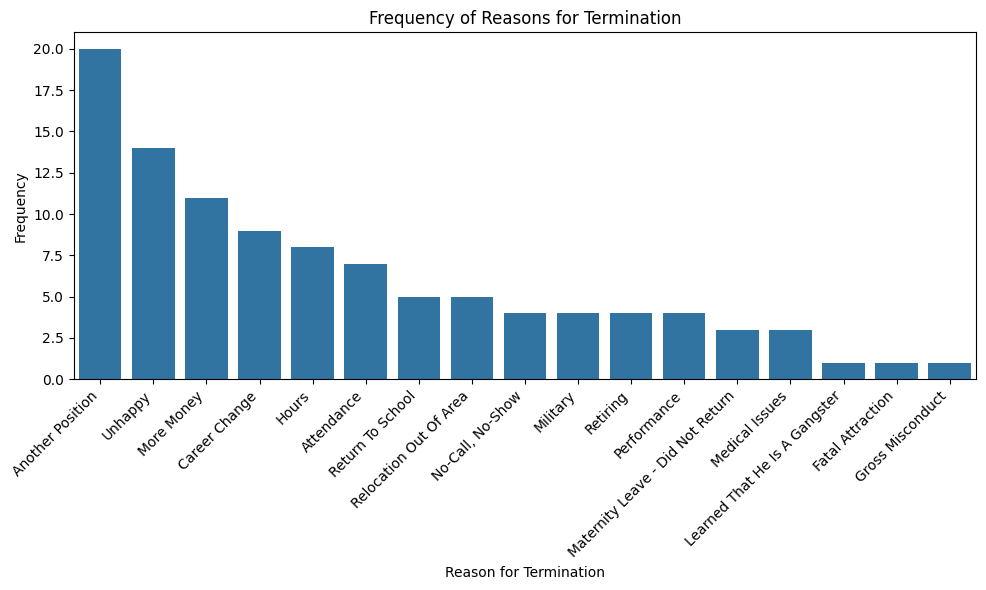

In [ ]:
# Exclude 'N/A-StillEmployed'
data = data[data['TermReason'] != 'N/A-Stillemployed']

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='TermReason', order=data['TermReason'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Reason for Termination')
plt.ylabel('Frequency')
plt.title('Frequency of Reasons for Termination')
plt.tight_layout()
plt.show()

## **2. Salary Analysis: Box plot of salaries across different departments**

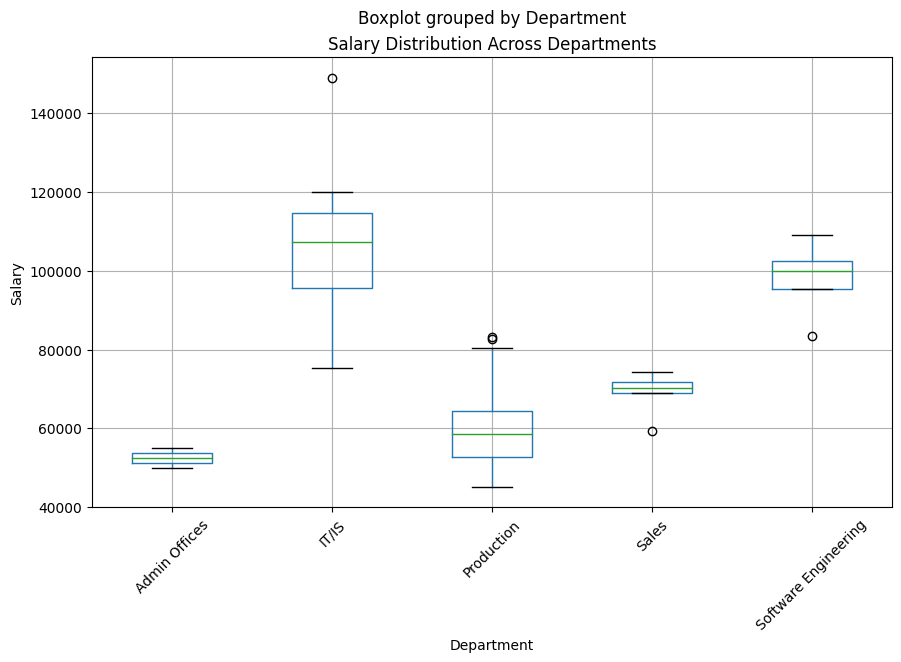

In [ ]:
data.boxplot(column='Salary', by='Department', figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('Salary Distribution Across Departments')
plt.xticks(rotation=45)
plt.show()

## **3. Employee Performance Analysis: Scatter plot of engagement survey ratings vs. performance scores**

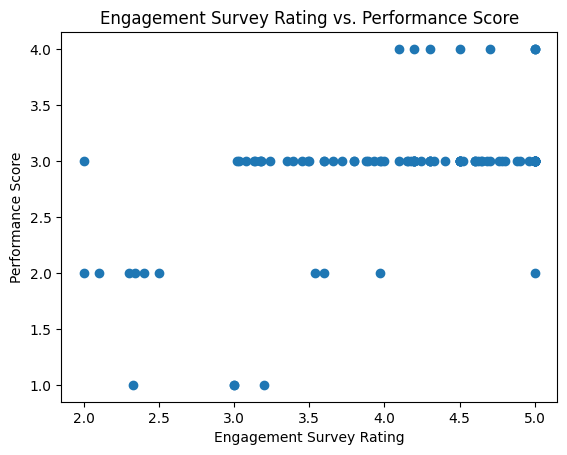

In [ ]:
plt.scatter(data['EngagementSurvey'], data['PerfScoreID'])
plt.xlabel('Engagement Survey Rating')
plt.ylabel('Performance Score')
plt.title('Engagement Survey Rating vs. Performance Score')
plt.show()

## **4. Diversity and Inclusion Analysis: Pie chart of gender diversity**

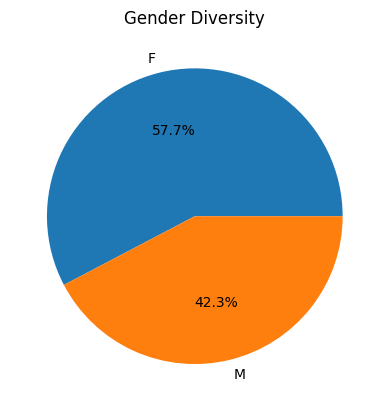

In [ ]:
data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Diversity')
plt.ylabel('')
plt.show()

## **5. Employee Satisfaction Analysis: Histogram of employee satisfaction levels and absenteeism**

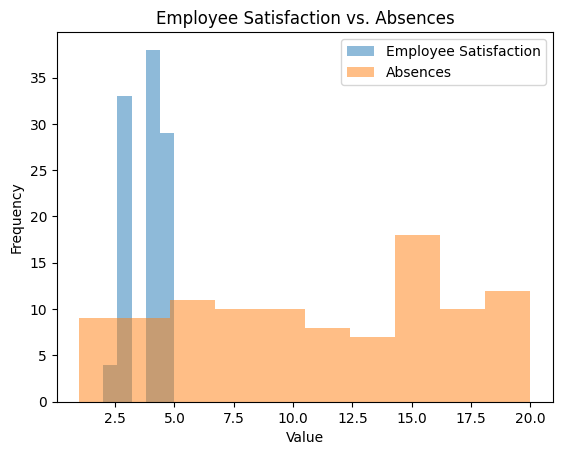

In [ ]:
plt.hist(data['EmpSatisfaction'], bins=5, alpha=0.5, label='Employee Satisfaction')
plt.hist(data['Absences'], bins=10, alpha=0.5, label='Absences')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Employee Satisfaction vs. Absences')
plt.legend()
plt.show()

## **6. Recruitment Source Analysis: Bar chart of recruitment source effectiveness**

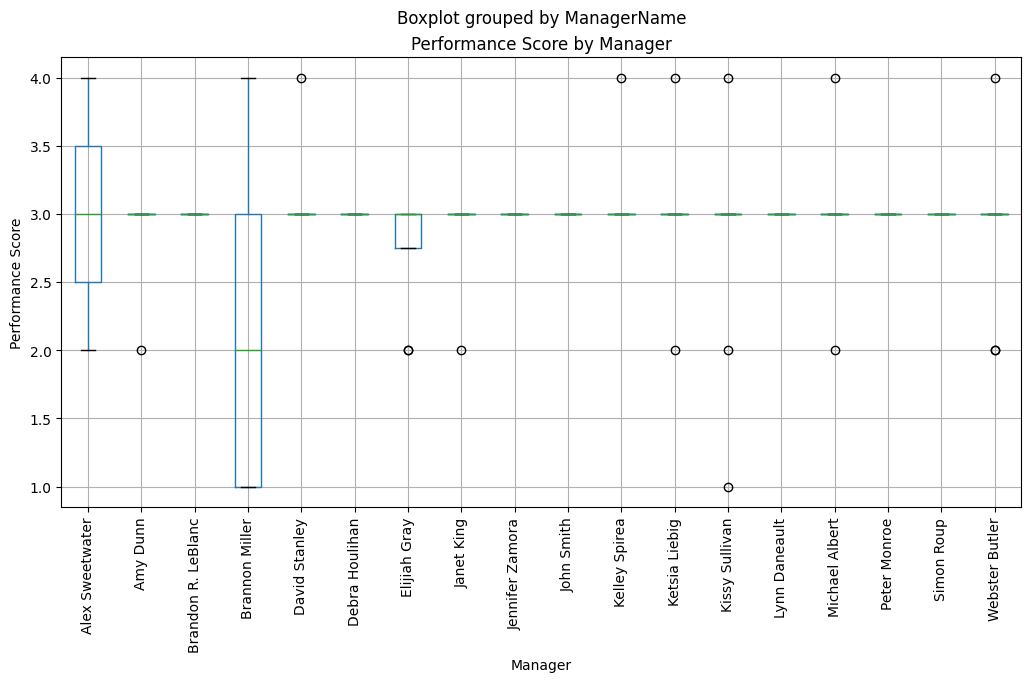

In [ ]:
data.boxplot(column='PerfScoreID', by='ManagerName', figsize=(12, 6))
plt.xlabel('Manager')
plt.ylabel('Performance Score')
plt.title('Performance Score by Manager')
plt.xticks(rotation=90)
plt.show()

## **7. Manager Performance Analysis: Box plot of performance scores by manager**

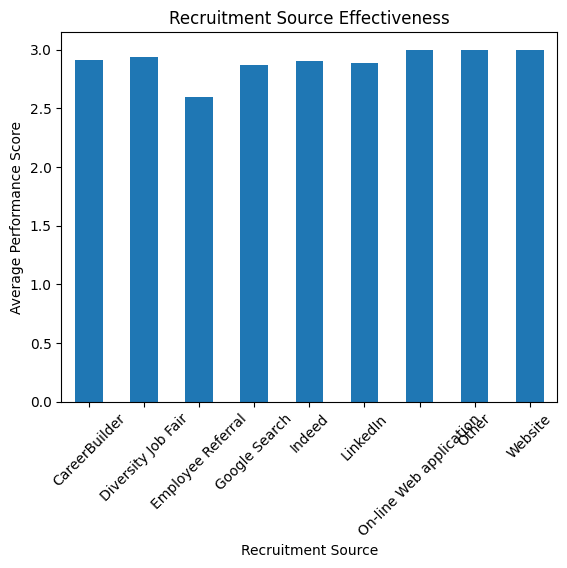

In [ ]:
# Assuming 'PerformanceScore' column contains string values
# Define a mapping of performance scores to numerical values
score_mapping = {
    'Exceeds': 4,
    'Fully Meets': 3,
    'Needs Improvement': 2,
    'PIP': 1,
}

# Map the string values to numerical values
data['PerformanceScore'] = data['PerformanceScore'].map(score_mapping)

# Now, you can plot the mean of performance scores
data.groupby('RecruitmentSource')['PerformanceScore'].mean().plot(kind='bar')
plt.xlabel('Recruitment Source')
plt.ylabel('Average Performance Score')
plt.title('Recruitment Source Effectiveness')
plt.xticks(rotation=45)
plt.show()

## **8. Special Projects Analysis: Violin plot of special project involvement vs. performance score**

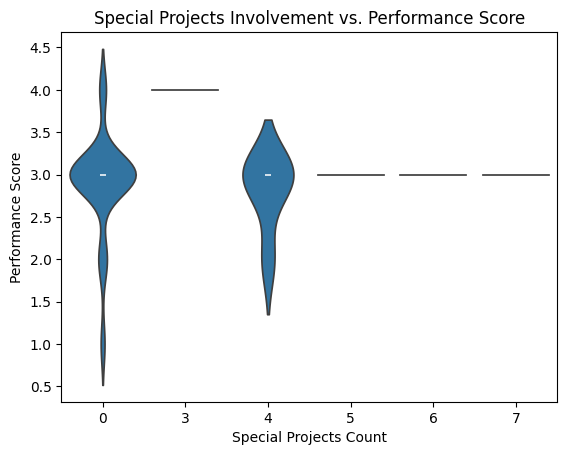

In [ ]:
sns.violinplot(x='SpecialProjectsCount', y='PerfScoreID', data=data)
plt.xlabel('Special Projects Count')
plt.ylabel('Performance Score')
plt.title('Special Projects Involvement vs. Performance Score')
plt.show()

## **9. Histogram of Salary**

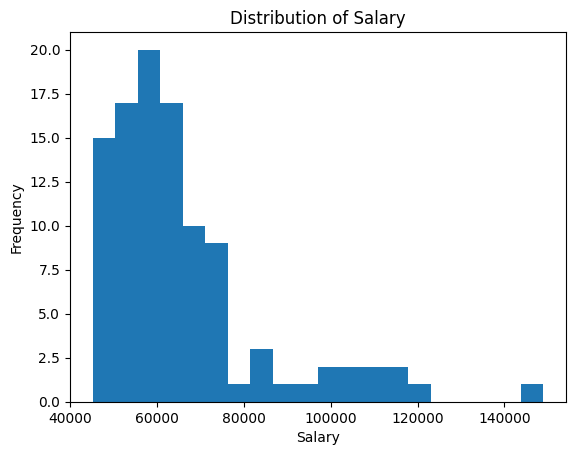

In [ ]:
plt.hist(data['Salary'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

## **10. Bar chart of Marital Status**

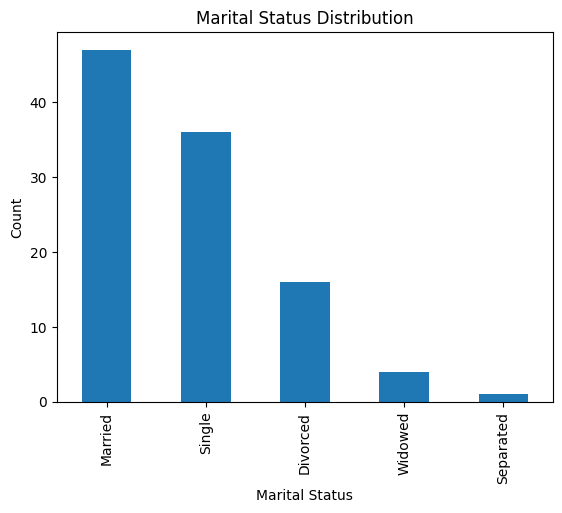

In [ ]:
data['MaritalDesc'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()